Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr0_condition1.tiff
SNR: 1.7030829602289985, CNR: 0.36437285186263807
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr0_evoltime1.tiff
SNR: 1.829578420994731, CNR: 0.3383501480443172
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr0_evoltime1.tiff
SNR: 2.132438425548975, CNR: 0.4819533642566009
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr0_condition1.png
SNR: 1.8493090090094073, CNR: 0.18364267527306524


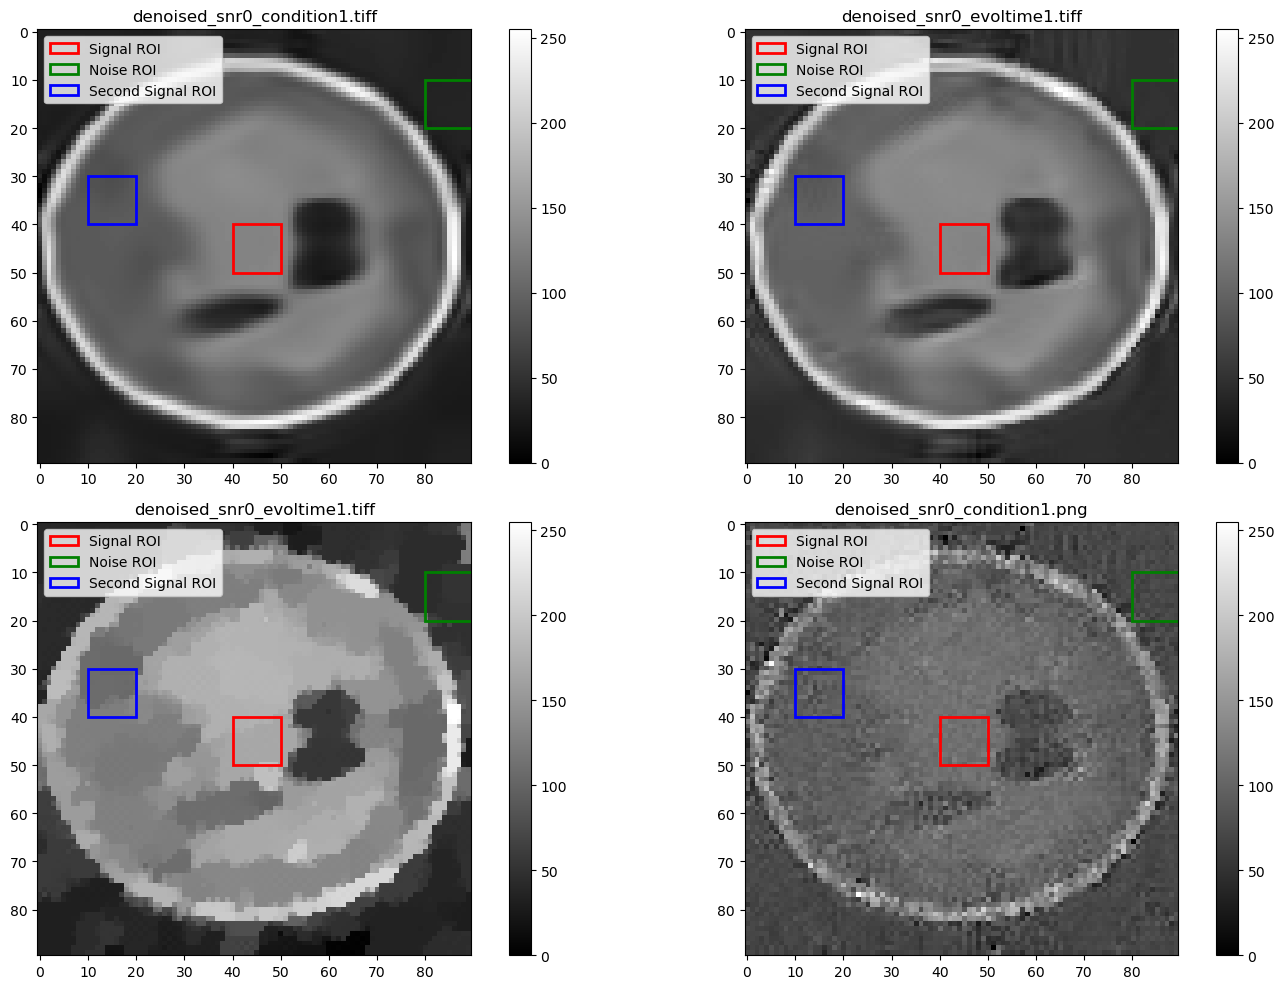

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr0_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr0_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr0_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr0_condition1.png']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)


Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr5_condition1.tiff
SNR: 1.6959115318410236, CNR: 0.3394294449857143
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr5_evoltime1.tiff
SNR: 1.693054387322324, CNR: 0.32138382806340315
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr5_evoltime1.tiff
SNR: 2.1236978766198717, CNR: 0.5483024927502581
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr5_condition1.png
SNR: 1.995822040181761, CNR: 0.280976477653541


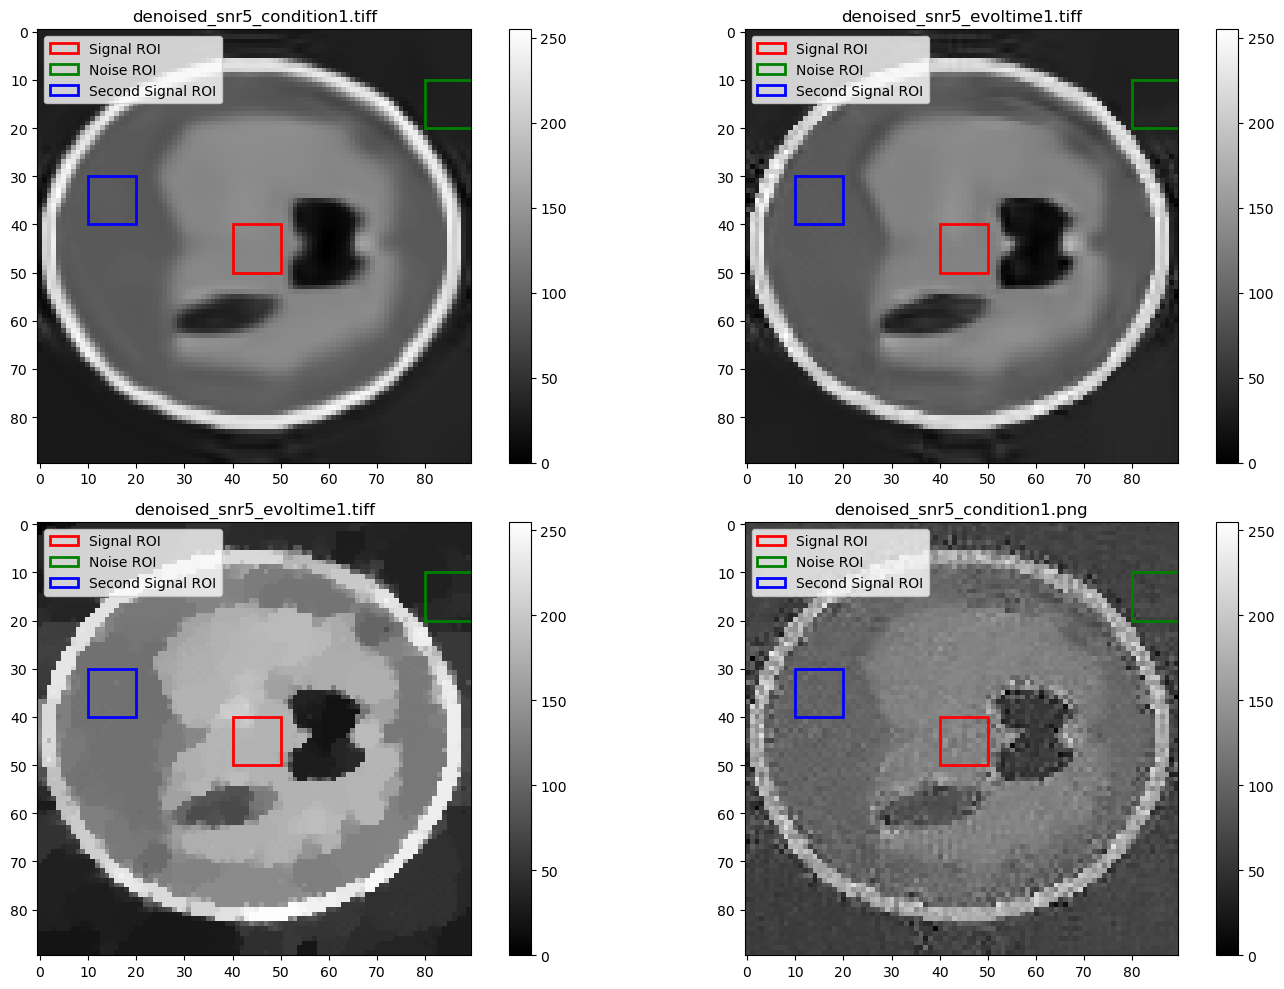

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr5_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr5_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr5_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr5_condition1.png']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr10_condition1.tiff
SNR: 1.831512176268527, CNR: 0.386375340177372
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr10_evoltime1.tiff
SNR: 1.7951857982680894, CNR: 0.37719794704880993
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr10_evoltime1.tiff
SNR: 1.8850193468097842, CNR: 0.5182090644718084
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr10_condition1.png
SNR: 2.314774026826461, CNR: 0.38007780024161386


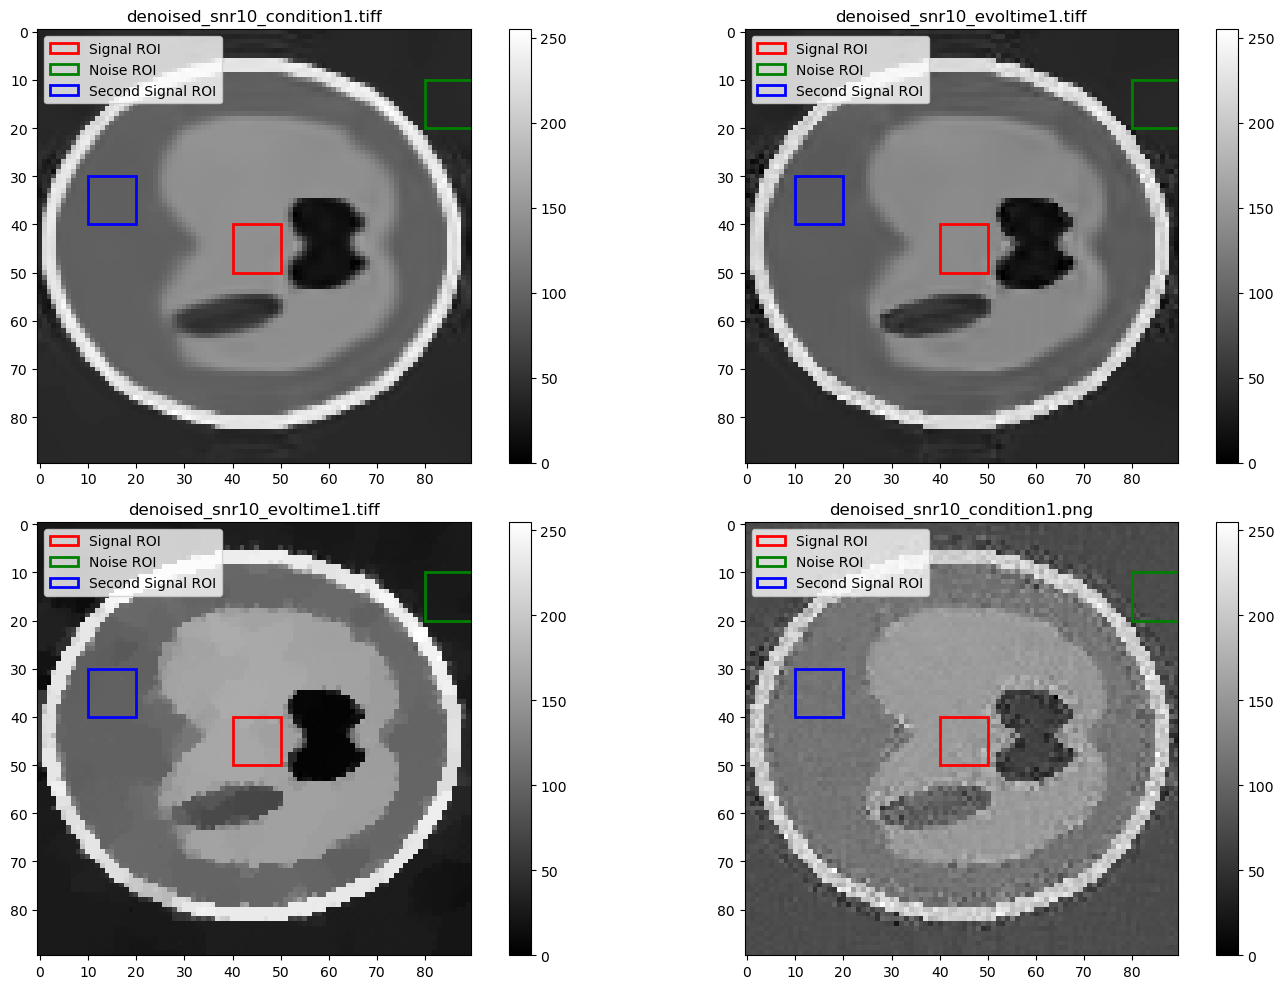

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation//BM3D_Denoised_Gaussian/denoised_snr10_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Gaussian/denoised_snr10_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Gaussian/denoised_snr10_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Gaussian/denoised_snr10_condition1.png']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr0_condition1.tiff
SNR: 1.7490709496350836, CNR: 0.3559132487811297
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr0_evoltime1.tiff
SNR: 1.7043555978005052, CNR: 0.3222343120291913
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr0_evoltime1.tiff
SNR: 1.872941239515674, CNR: 0.39900915791783403
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr0_condition1.tiff
SNR: 2.359471396342259, CNR: 0.27737802599237016


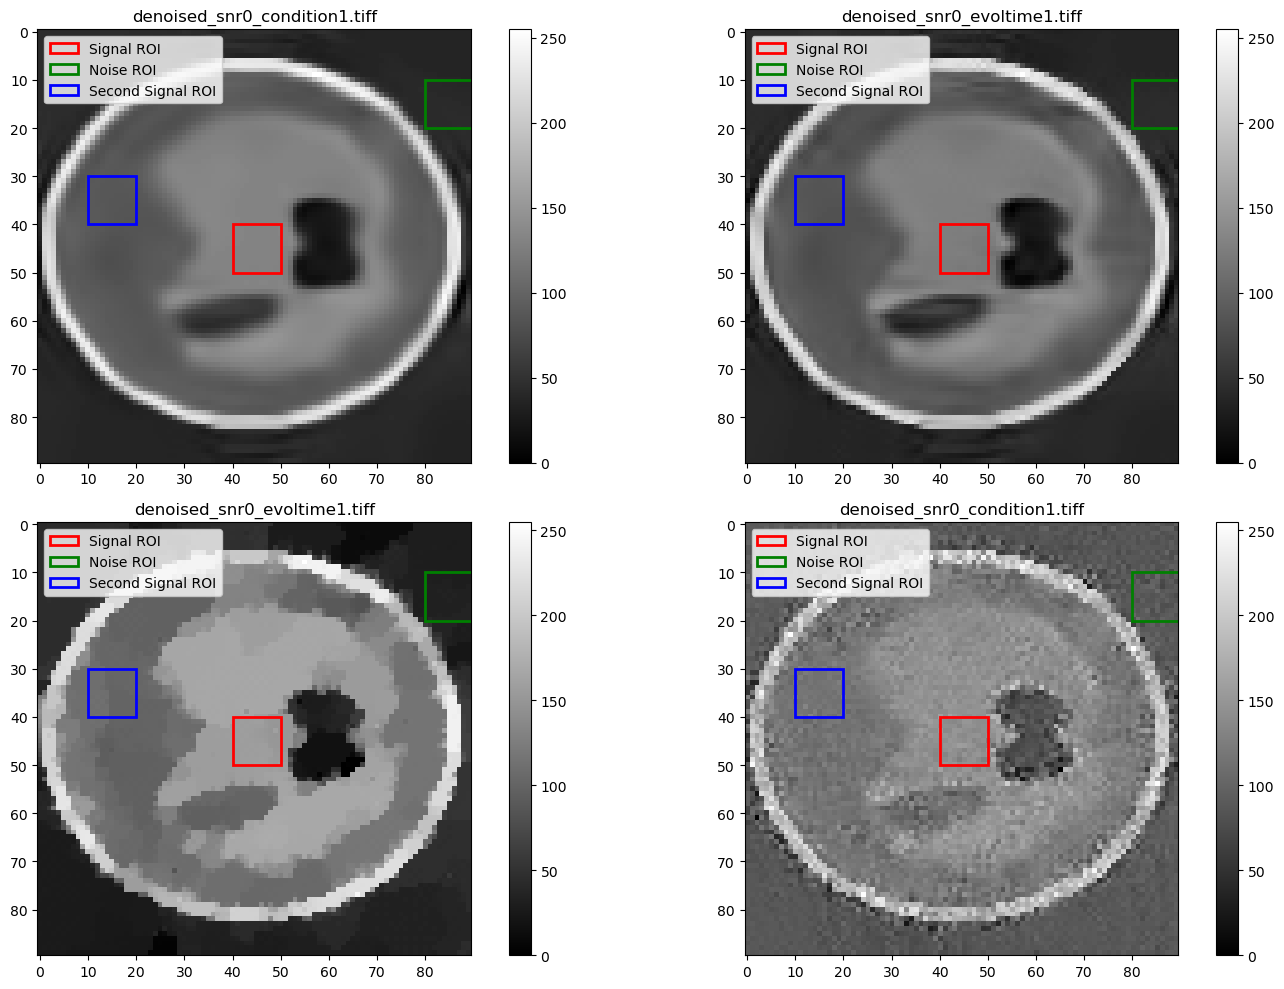

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr0_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr0_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr0_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr0_condition1.tiff']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr5_condition1.tiff
SNR: 1.68282503458531, CNR: 0.37739601084825153
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr5_evoltime1.tiff
SNR: 1.681155103373753, CNR: 0.35683466841331146
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr5_evoltime1.tiff
SNR: 1.830331724328379, CNR: 0.4746881369615919
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr5_condition1.tiff
SNR: 1.9181296709807205, CNR: 0.33697693726511074


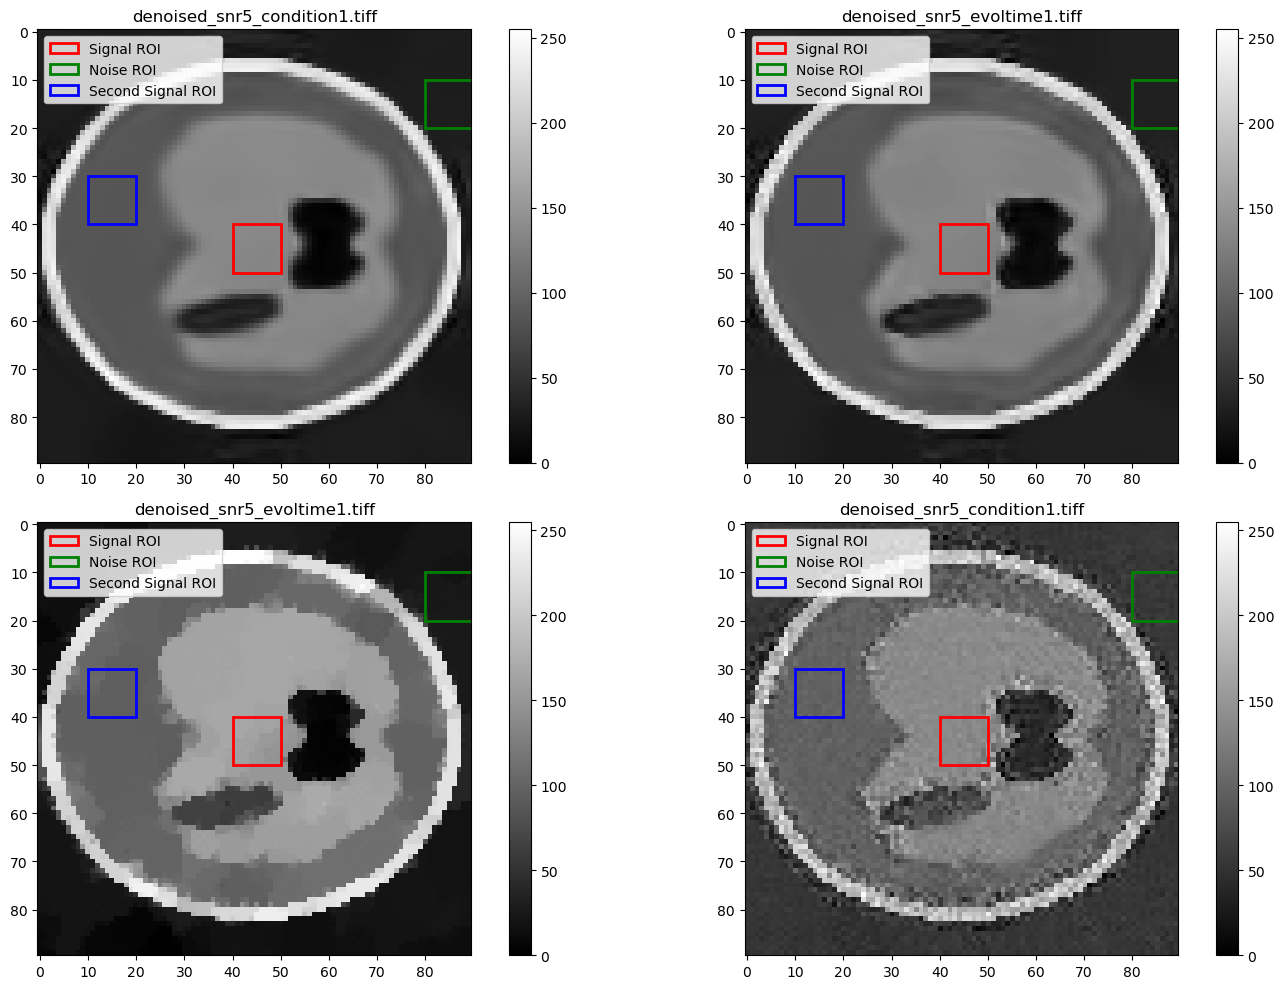

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr5_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr5_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr5_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr5_condition1.tiff']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)


Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr10_condition1.tiff
SNR: 1.8188472493465528, CNR: 0.3881758585930836
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr10_evoltime1.tiff
SNR: 1.84636749142597, CNR: 0.38525741094331895
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr10_evoltime1.tiff
SNR: 1.8274782945388044, CNR: 0.5034243772584561
Image: ../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr10_condition1.tiff
SNR: 1.9536689022137446, CNR: 0.3979680297979749


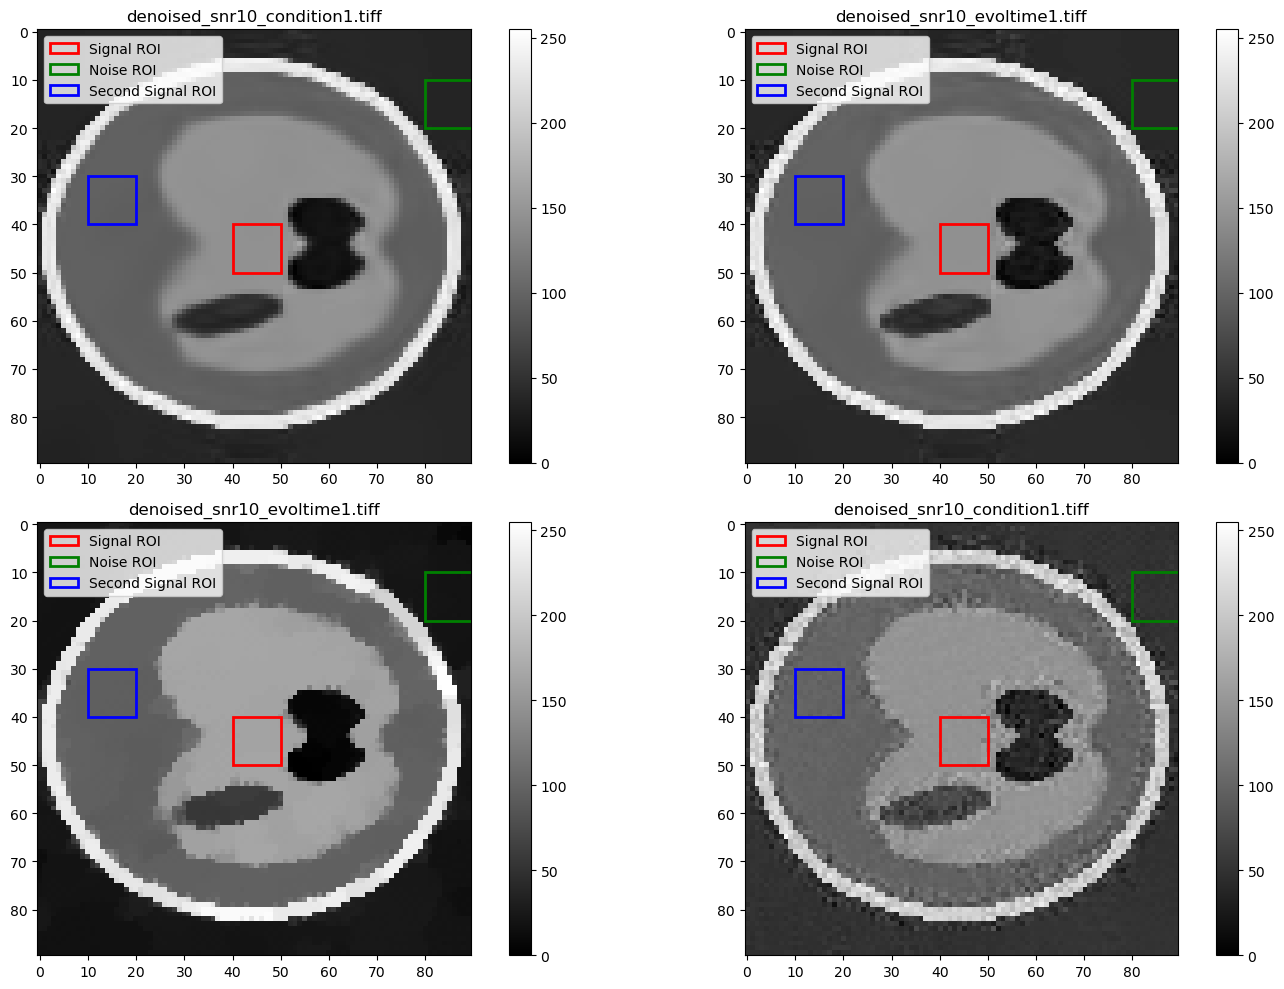

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM3D_Denoised_Rician/denoised_snr10_condition1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/BM4D_Denoised_Rician/denoised_snr10_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/TV_Denoised_Rician/denoised_snr10_evoltime1.tiff',
    '../Experiments/DenoisedImages/TaditionalMethods_Simulation/NLM_Denoised_Rician/denoised_snr10_condition1.tiff']
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)